<a href="https://colab.research.google.com/github/saleh1312/DeepFake/blob/main/train_deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 450kB 40.6MB/s 
     |████████████████████████████████| 3.9MB 37.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=01c7bdbb95ec8fa4a39bed4c4b17d1794be7b9c7a6941ea9d042d9378c266503
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninsta

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
import tensorflow.keras as keras
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
from tensorflow.keras.layers import LeakyReLU

In [ ]:
da7_x = np.load('/content/drive/MyDrive/da7ee7.npy').astype(np.float32)
scar_x = np.load('/content/drive/MyDrive/scar.npy').astype(np.float32)
da7_x=da7_x/255.0
scar_x=scar_x/255.0
da7_x[da7_x<0]=-1
scar_x[scar_x<0]=-1
da7_y=da7_x.copy()
scar_y=scar_x.copy()
da7_x,da7_y=shuffle(da7_x,da7_y)
scar_x,scar_y=shuffle(scar_x,scar_y)

**Building the encoder**



In [ ]:
input_img=Input(shape=(128, 128, 3))
x = Conv2D(256, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(input_img)
x=BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x)
x=BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x)
x=BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x)
x=BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

encoded = Flatten()(x)
encoded = Dense(512,activation='relu')(encoded)
encoded = Dense((8*8*512),activation='relu')(encoded)
encoded=Reshape((8,8,512))(encoded)

#img1
x1 = Conv2D(256, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(encoded)
x1=BatchNormalization()(x1)
x1 = UpSampling2D((2, 2))(x1)

x1 = Conv2D(128, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x1)
x1=BatchNormalization()(x1)
x1 = UpSampling2D((2, 2))(x1)

x1 = Conv2D(64, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x1)
x1=BatchNormalization()(x1)
x1 = UpSampling2D((2, 2))(x1)

x1 = Conv2D(32, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x1)
x1=BatchNormalization()(x1)
x1 = UpSampling2D((2, 2))(x1)
x1 = Conv2D(32, (3, 3), activation=LeakyReLU(0.2), padding='same')(x1)
x1 = Conv2D(16, (3, 3), activation=LeakyReLU(0.2), padding='same',)(x1)
x1 = Conv2D(3, (3, 3), activation='tanh', padding='same')(x1)
x1 = Conv2D(3, (3, 3), activation='tanh', padding='same')(x1)
#img2
x2 = Conv2D(256, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(encoded)
x2=BatchNormalization()(x2)
x2 = UpSampling2D((2, 2))(x2)

x2 = Conv2D(128, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x2)
x2=BatchNormalization()(x2)
x2 = UpSampling2D((2, 2))(x2)

x2 = Conv2D(64, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x2)
x2=BatchNormalization()(x2)
x2 = UpSampling2D((2, 2))(x2)

x2 = Conv2D(32, (5, 5), activation=LeakyReLU(0.2), padding='same',use_bias=False)(x2)
x2=BatchNormalization()(x2)
x2 = UpSampling2D((2, 2))(x2)
x2 = Conv2D(32, (3, 3), activation=LeakyReLU(0.2), padding='same')(x2)
x2 = Conv2D(16, (3, 3), activation=LeakyReLU(0.2), padding='same')(x2)
x2 = Conv2D(3, (3, 3), activation='tanh', padding='same')(x2)
x2 = Conv2D(3, (3, 3), activation='tanh', padding='same')(x2)

e1 = Model(input_img, x1)


e2 = Model(input_img, x2)

In [ ]:
e2.summary()

In [ ]:
e1.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss='mse')
e2.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss='mse')


In [ ]:
for i in range(500):
  print("-------")
  print(i)
  print("-------")
  print("nicolas==============================================")
  e1.fit(da7_x,da7_y,128,1)
  print("scarleet==============================================")
  e2.fit(scar_x,scar_y,128,1)

In [ ]:
e1.save('/content/drive/MyDrive/encoder-da7ee7.h5')
e2.save('/content/drive/MyDrive/encoder-scar.h5')

In [ ]:
e1=tf.keras.models.load_model('/content/drive/MyDrive/encoder-da7ee7.h5', custom_objects={'LeakyReLU': LeakyReLU(0.2)})
e2=tf.keras.models.load_model('/content/drive/MyDrive/encoder-scar.h5', custom_objects={'LeakyReLU': LeakyReLU(0.2)})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


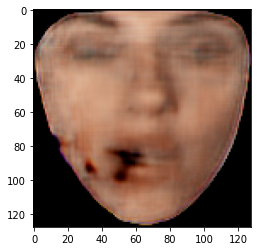

In [ ]:
img=da7_x[0]
t=np.reshape(img,(1,128,128,3)).astype(np.float32)
o=e2.predict(t)
o=((((np.reshape(o,(128,128,3)).astype(np.float32)))))
o=cv2.cvtColor(o,cv2.COLOR_BGR2RGB)
plt.imshow(o)